In [41]:
import pandas as pd
import ast
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_pickle('mfcc_features.pkl')

In [35]:
df

,filename,label,features
0,airport-barcelona-0-0-a.wav,indoor,"[-545.6894738968438, 135.15608273927344, -1.86..."
1,airport-barcelona-0-1-a.wav,indoor,"[-519.7085822076541, 134.700414999446, -12.788..."
2,airport-barcelona-0-10-a.wav,indoor,"[-560.1909568856395, 132.46687341449902, -4.82..."
3,airport-barcelona-0-11-a.wav,indoor,"[-559.4571427692981, 132.9209007649571, -2.835..."
4,airport-barcelona-0-12-a.wav,indoor,"[-521.6097489476367, 116.03648517699398, -2.08..."
...,...,...,...
14395,park-london-95-2653-a.wav,outdoor,"[-656.6448205939537, 147.51586043428446, 1.282..."
14396,park-london-95-2654-a.wav,outdoor,"[-610.3197884003037, 130.14039865650446, 1.510..."
14397,park-london-95-2655-a.wav,outdoor,"[-630.8563761433412, 138.05271462863797, 33.86..."
14398,park-london-95-2656-a.wav,outdoor,"[-660.3107849795514, 152.84756163698097, 13.26..."


In [8]:
fold_test = pd.read_csv('fold1_test.csv')
fold_train = pd.read_csv('fold1_train.csv', sep='\t')

In [6]:
fold_test

,filename
0,audio/street_pedestrian-lyon-1162-44093-a.wav
1,audio/metro-prague-1163-44094-a.wav
2,audio/park-milan-1164-44095-a.wav
3,audio/street_pedestrian-milan-1165-44096-a.wav
4,audio/street_traffic-milan-1166-44097-a.wav
...,...
4180,audio/tram-vienna-285-8635-a.wav
4181,audio/tram-vienna-285-8636-a.wav
4182,audio/tram-vienna-285-8637-a.wav
4183,audio/tram-vienna-285-8638-a.wav


In [13]:
fold_train['filename'] = fold_train.filename.apply(lambda x: x.split('/')[-1])

In [36]:
X_train, y_train = df[df.filename.isin(fold_train.filename.to_list())]['features'], df[df.filename.isin(fold_train.filename.to_list())]['label']

features: 0 à 12 (MFCCS), 13 à 25 (Deltas), 26 à 38 (Delta-deltas)

In [56]:
X_train.shape

(9185,)

In [48]:
np.stack(X_train.values)

array([[-5.45689474e+02,  1.35156083e+02, -1.86448788e+00, ...,
         1.33679543e-03,  3.75299487e-03, -1.66123030e-02],
       [-5.19708582e+02,  1.34700415e+02, -1.27882562e+01, ...,
        -7.12131477e-03,  1.68226885e-03,  3.76669937e-03],
       [-5.60190957e+02,  1.32466873e+02, -4.82311639e+00, ...,
        -4.24286114e-03,  5.20816716e-03,  6.75960921e-03],
       ...,
       [-6.30856376e+02,  1.38052715e+02,  3.38652613e+01, ...,
        -5.56328481e-05, -5.40971223e-03, -1.86132175e-02],
       [-6.60310785e+02,  1.52847562e+02,  1.32698170e+01, ...,
        -4.10179433e-03,  1.98360172e-03, -1.07680459e-02],
       [-6.25792730e+02,  1.27386419e+02,  4.31374373e+01, ...,
         8.58702999e-03,  6.68746458e-03,  3.22643179e-03]],
      shape=(9185, 39))

In [49]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.stack(X_train.values))


In [57]:
pca.explained_variance_ratio_


array([0.87803837, 0.04443342])

In [58]:
pca.components_

array([[ 9.98919538e-01,  1.76927574e-02, -1.80496759e-02,
        -8.64681209e-03, -1.85236358e-02, -1.92699980e-02,
        -2.00277151e-02, -9.80232406e-03, -4.99732056e-03,
        -6.96225435e-03, -8.29328571e-03, -2.05254996e-03,
        -9.38480519e-03, -1.57789873e-06,  3.36669621e-07,
         5.62910554e-06, -4.84018930e-06, -1.81622348e-06,
        -1.85202834e-06, -4.57688590e-06, -9.84658724e-07,
        -7.52402323e-07, -8.48723277e-07, -8.11908294e-07,
        -2.97208802e-06, -1.80513810e-06, -1.08716132e-05,
         3.84407601e-06, -1.11332041e-05,  1.75915032e-06,
         4.11538840e-06,  1.16492652e-06,  9.68148947e-06,
         1.59594667e-06,  2.97010264e-06,  2.16571027e-06,
         5.69823029e-07, -1.50429257e-06, -2.42397391e-08],
       [-2.61084294e-02,  9.27714619e-01, -3.45161632e-01,
        -7.79238026e-02, -8.79116874e-02, -5.34286571e-02,
         2.80476744e-02, -2.07745707e-02, -1.88100416e-02,
        -1.13587536e-02, -1.47105999e-02, -2.86363119e-

In [54]:
np.stack(X_train.values)

array([[-5.45689474e+02,  1.35156083e+02, -1.86448788e+00, ...,
         1.33679543e-03,  3.75299487e-03, -1.66123030e-02],
       [-5.19708582e+02,  1.34700415e+02, -1.27882562e+01, ...,
        -7.12131477e-03,  1.68226885e-03,  3.76669937e-03],
       [-5.60190957e+02,  1.32466873e+02, -4.82311639e+00, ...,
        -4.24286114e-03,  5.20816716e-03,  6.75960921e-03],
       ...,
       [-6.30856376e+02,  1.38052715e+02,  3.38652613e+01, ...,
        -5.56328481e-05, -5.40971223e-03, -1.86132175e-02],
       [-6.60310785e+02,  1.52847562e+02,  1.32698170e+01, ...,
        -4.10179433e-03,  1.98360172e-03, -1.07680459e-02],
       [-6.25792730e+02,  1.27386419e+02,  4.31374373e+01, ...,
         8.58702999e-03,  6.68746458e-03,  3.22643179e-03]],
      shape=(9185, 39))

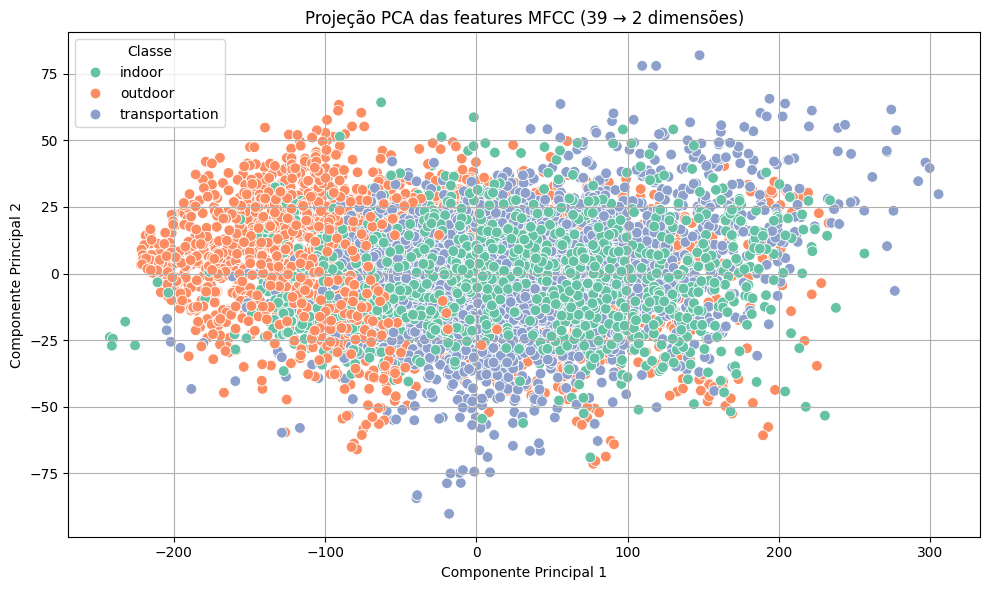

In [50]:

# Plotar com seaborn
pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "label": y_train
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="label", palette="Set2", s=60)
plt.title("Projeção PCA das features MFCC (39 → 2 dimensões)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Classe")
plt.grid(True)
plt.tight_layout()
plt.show()

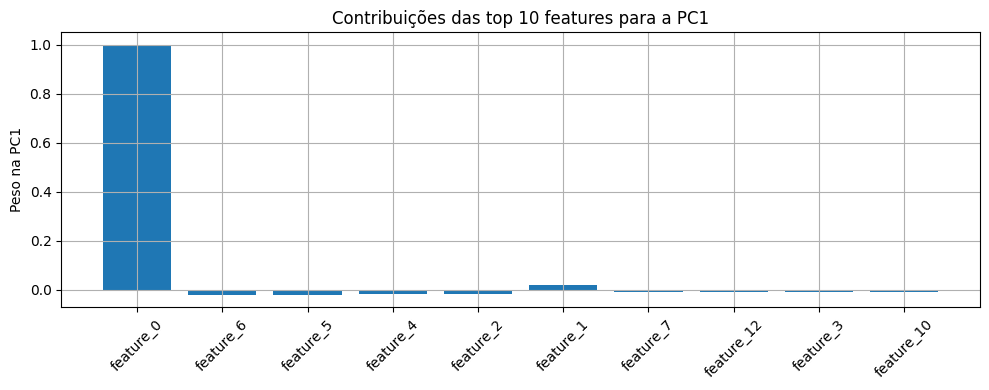

In [59]:
pc1_weights = pca.components_[0]
top_indices = np.argsort(np.abs(pc1_weights))[::-1][:10]

plt.figure(figsize=(10, 4))
plt.bar(range(10), pc1_weights[top_indices])
plt.xticks(range(10), [f'feature_{i}' for i in top_indices], rotation=45)
plt.title("Contribuições das top 10 features para a PC1")
plt.ylabel("Peso na PC1")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
df_cnn = pd.read_pickle('mfcc_features_cnn.pkl')

In [62]:
X_train_cnn, y_train_cnn = df_cnn[df_cnn.filename.isin(fold_train.filename.to_list())]['features'], df_cnn[df_cnn.filename.isin(fold_train.filename.to_list())]['label']

In [63]:
X_test_cnn, y_test_cnn = df_cnn[df_cnn.filename.isin(fold_test.filename.to_list())]['features'], df_cnn[df_cnn.filename.isin(fold_test.filename.to_list())]['label']

In [74]:
df[df.filename.isin(fold_test.filename.to_list())]

,filename,label,features


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [76]:
X_train_cnn

0        [[[-592.491874575285, -554.7002196485466, -559...
1        [[[-523.1084437875274, -502.62292577477837, -5...
2        [[[-598.6412182954232, -481.5678806208173, -42...
3        [[[-621.5618738749473, -582.8207559626483, -56...
4        [[[-534.4597716983487, -522.9244336283126, -53...
                               ...                        
14395    [[[-677.1573793097845, -641.9936536435457, -64...
14396    [[[-581.1768917514836, -584.2364779032084, -59...
14397    [[[-512.0386453069632, -565.9465095454177, -62...
14398    [[[-682.1318243609724, -661.1209106087612, -65...
14399    [[[-558.8791997322791, -598.6009473245651, -62...
Name: features, Length: 9185, dtype: object

In [77]:
X = X_train_cnn.values
y = y_train_cnn.values

In [109]:
# Transforma lista de arrays em um array padronizado (com padding)
max_T = max(x.shape[2] for x in X)
X_pad = np.zeros((len(X), 3, 13, max_T), dtype=np.float32)

for i, x in enumerate(X):
    T = x.shape[2]
    X_pad[i, :, :, :T] = x

# Ajuste de canais para Keras (channels_last)
X_pad = np.transpose(X_pad, (0, 2, 3, 1))  # shape: (N, 13, T, 3)

In [110]:
X_pad[0]

array([[[-5.9249188e+02, -5.7527030e-01, -2.0858998e+00],
        [-5.5470020e+02, -5.7527030e-01, -2.0858998e+00],
        [-5.5957996e+02, -5.7527030e-01, -2.0858998e+00],
        ...,
        [-5.8820251e+02, -2.4682784e+00,  1.5141299e-01],
        [-5.8558533e+02, -2.4682784e+00,  1.5141299e-01],
        [-5.9117468e+02, -2.4682784e+00,  1.5141299e-01]],

       [[ 1.1322553e+02,  3.0950353e+00,  1.2424877e+00],
        [ 1.1655524e+02,  3.0950353e+00,  1.2424877e+00],
        [ 1.1735532e+02,  3.0950353e+00,  1.2424877e+00],
        ...,
        [ 1.5162561e+02,  1.9011219e+00,  1.0797043e-01],
        [ 1.4574197e+02,  1.9011219e+00,  1.0797043e-01],
        [ 1.4481949e+02,  1.9011219e+00,  1.0797043e-01]],

       [[ 4.2802668e+00, -9.9110204e-01, -1.5202744e+00],
        [ 4.7783833e+00, -9.9110204e-01, -1.5202744e+00],
        [ 4.3800311e+00, -9.9110204e-01, -1.5202744e+00],
        ...,
        [ 8.8418207e+00,  1.0011200e+00,  5.8826005e-01],
        [ 1.0059791e+01,  1.0

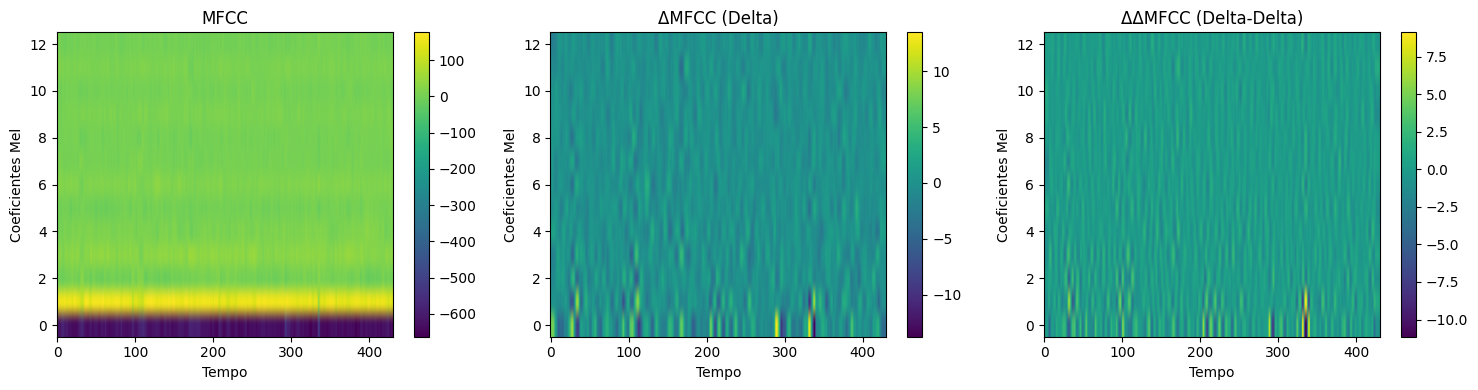

In [90]:
# Escolhe uma amostra (ex: a primeira)
sample = X_pad[2000]  # shape: (13, T, 3)

# Separar os canais
mfcc = sample[:, :, 0]
delta = sample[:, :, 1]
delta2 = sample[:, :, 2]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

titles = ['MFCC', 'ΔMFCC (Delta)', 'ΔΔMFCC (Delta-Delta)']
data = [mfcc, delta, delta2]

for ax, mat, title in zip(axes, data, titles):
    img = ax.imshow(mat, aspect='auto', origin='lower', cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Coeficientes Mel')
    fig.colorbar(img, ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()

In [93]:
# Codificação dos rótulos
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = tf.keras.utils.to_categorical(y_encoded)

In [101]:
def normalize_tensor(x):
    # x shape: (3, 13, T)
    mean = np.mean(x, axis=(1, 2), keepdims=True)
    std = np.std(x, axis=(1, 2), keepdims=True)
    return (x - mean) / (std + 1e-8)

In [105]:
X_pad.shape

(9185, 13, 431, 3)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(13, max_T, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\netog\Downloads\3670185\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 11, 429, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 214, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 212, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 106, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6784)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       868,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 888,259 (3.39 MB)

 Trainable params: 888,259 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
from tensorflow.keras.callbacks import EarlyStopping


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.2, random_state=42)


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]

)

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.5953 - loss: 9.6602 - val_accuracy: 0.7447 - val_loss: 0.6230
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.7299 - loss: 0.6501 - val_accuracy: 0.7795 - val_loss: 0.5452
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.7658 - loss: 0.5861 - val_accuracy: 0.7735 - val_loss: 0.5465
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.7798 - loss: 0.5542 - val_accuracy: 0.7812 - val_loss: 0.5254
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.7802 - loss: 0.5554 - val_accuracy: 0.7768 - val_loss: 0.5271
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.7716 - loss: 0.5434 - val_accuracy: 0.8187 - val_loss: 0.4499
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.7824 - loss: 0.5462 - val_accuracy: 0.8051 - val_loss: 0.4963
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step - accuracy: 0.7836 - loss: 0.5109 

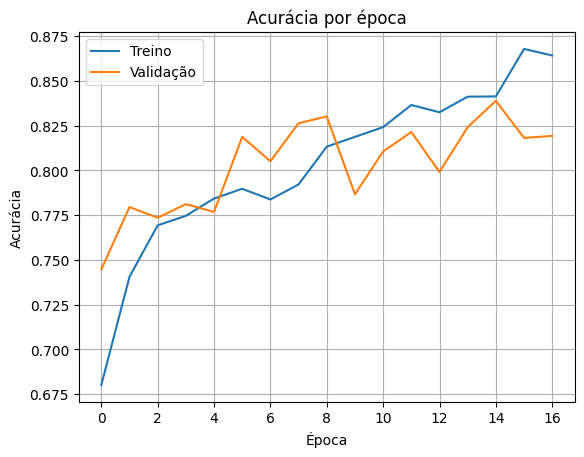

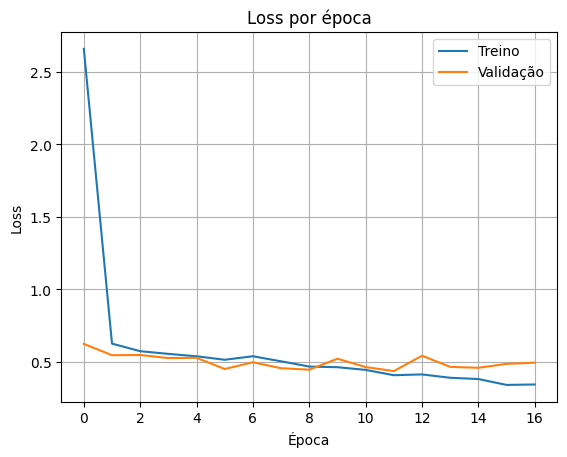

In [113]:
# Acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss por época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


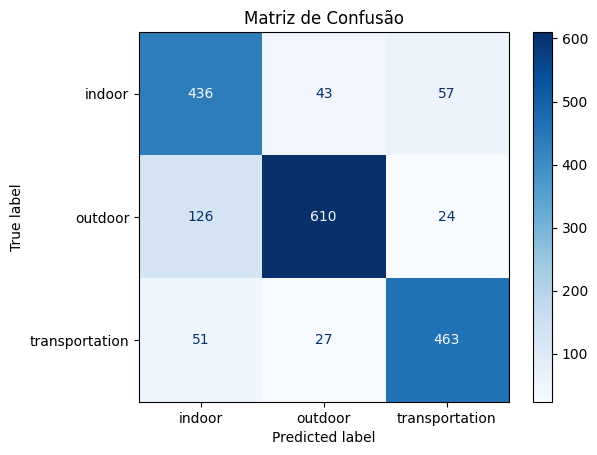

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

In [115]:
model.save("modelo_cnn_v1_asc.keras")
